In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import SDE
import numpy as np
import time
import pandas as pd

In [2]:
x0 = 0.0
seed = 777

In [3]:
def plot_x_xt(ax, x, xt, title=""):
    ax.plot(x, color = 'blue', label='x')
    ax.plot(xt, color = 'red', label='xt', alpha=0.5)
    ax.legend()

    ax.set_title(title)
    ax.set_ylabel("x, x\'")
    ax.set_xlabel("ti")

### Численное решение уравнения  $\frac{dx}{dt} = -sin(x) + a + \xi(t)$

#### 1.1. Схема Эйлера

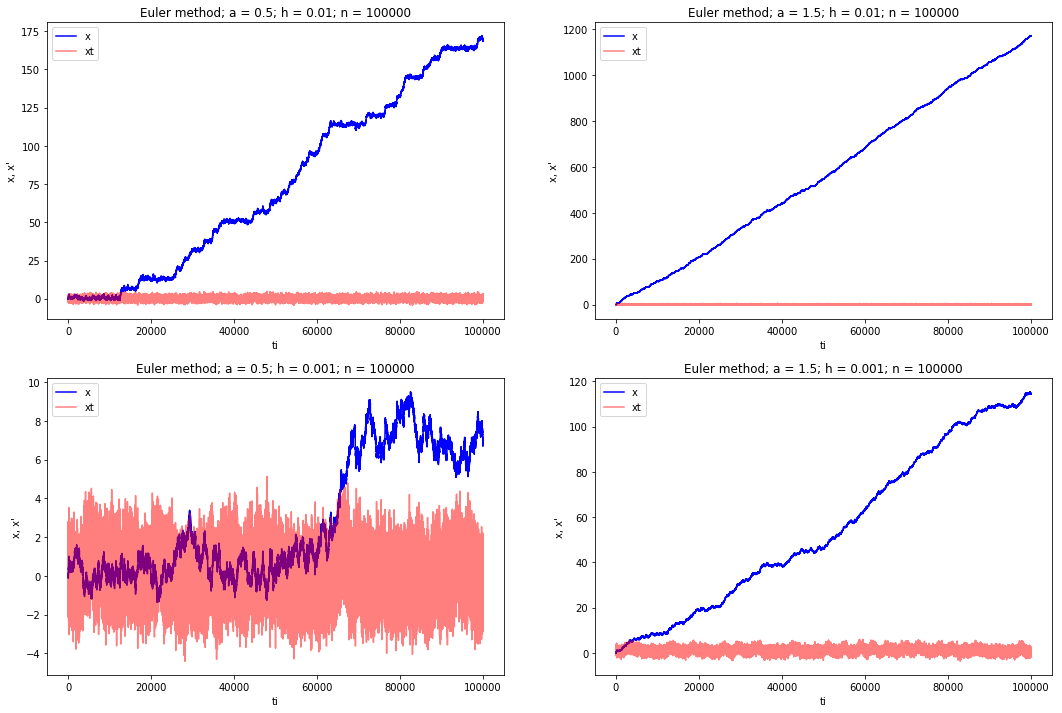

In [4]:
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

a = 0.5
n = 100000
h = 1e-2
x, xt = SDE.euler(x0, h, n, a, seed)
plot_x_xt(ax1, x, xt, "Euler method; a = {}; h = {}; n = {}".format(a, h, n))

a = 1.5
n = 100000
h = 1e-2
x, xt = SDE.euler(x0, h, n, a, seed)
plot_x_xt(ax2, x, xt, "Euler method; a = {}; h = {}; n = {}".format(a, h, n))

a = 0.5
n = 100000
h = 1e-3
x, xt = SDE.euler(x0, h, n, a, seed)
plot_x_xt(ax3, x, xt, "Euler method; a = {}; h = {}; n = {}".format(a, h, n))

a = 1.5
n = 100000
h = 1e-3
x, xt = SDE.euler(x0, h, n, a, seed)
plot_x_xt(ax4, x, xt, "Euler method; a = {}; h = {}; n = {}".format(a, h, n))

#### 1.2. Схема Хьюна

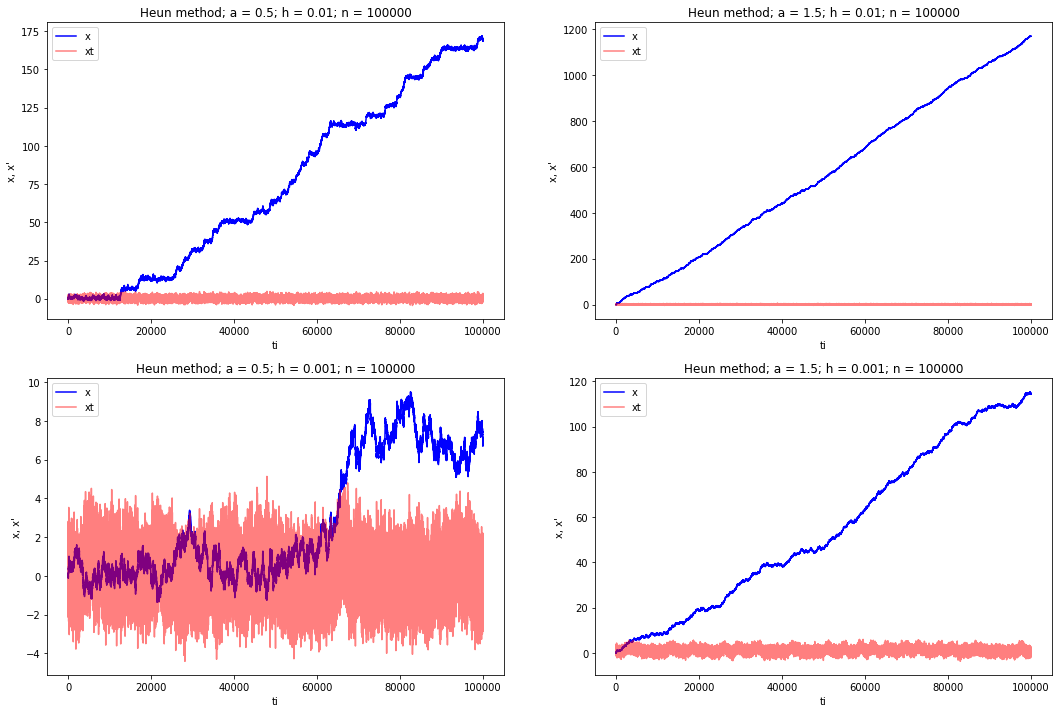

In [5]:
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

n_iter = 1
D = 1.0
n_threads = 1

a = 0.5
n = 100000
h = 1e-2
x, xt,_ = SDE.heun(x0, h, n, a, seed, n_iter, D, n_threads)
plot_x_xt(ax1, x, xt, "Heun method; a = {}; h = {}; n = {}".format(a, h, n))

a = 1.5
n = 100000
h = 1e-2
x, xt,_ = SDE.heun(x0, h, n, a, seed, n_iter, D, n_threads)
plot_x_xt(ax2, x, xt, "Heun method; a = {}; h = {}; n = {}".format(a, h, n))

a = 0.5
n = 100000
h = 1e-3
x, xt,_ = SDE.heun(x0, h, n, a, seed, n_iter, D, n_threads)
plot_x_xt(ax3, x, xt, "Heun method; a = {}; h = {}; n = {}".format(a, h, n))

a = 1.5
n = 100000
h = 1e-3
x, xt,_ = SDE.heun(x0, h, n, a, seed, n_iter, D, n_threads)
plot_x_xt(ax4, x, xt, "Heun method; a = {}; h = {}; n = {}".format(a, h, n))

#### 2.1. Вероятность принадлежности интервалу $(-\pi; \pi)$ при различных интенсивностях шума (D)

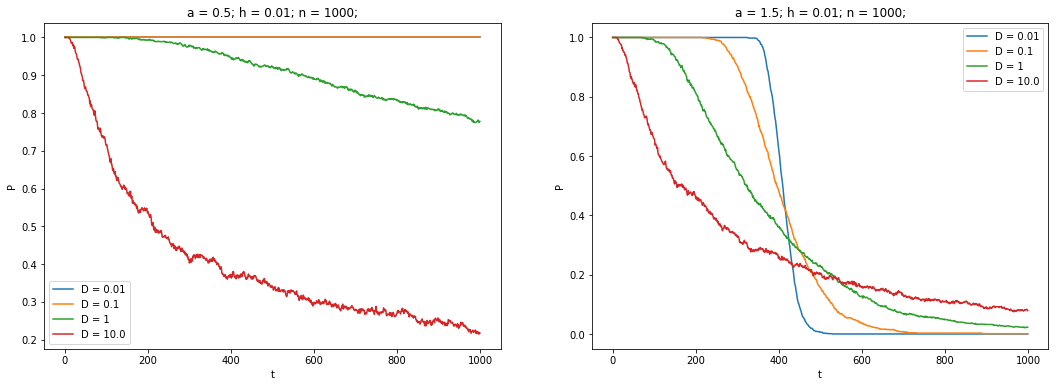

In [6]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

n_iter = 1000
n_threads = 4

n = 1000
h = 0.01

D = [1e-2, 1e-1, 1, 1e+1]

for z in (ax1, 0.5), (ax2, 1.5):
    for d in D:
        ax, a = z
        _, _, prob = SDE.heun(x0, h, n, a, seed, n_iter, d, n_threads)
        ax.plot(prob, label='D = {}'.format(d))
        ax.set_ylabel("P")
        ax.set_xlabel("t")
        ax.set_title("a = {}; h = {}; n = {};".format(a, h, n))
        ax.legend()

#### 2.2. Зависимость от интенсивности шума (D)

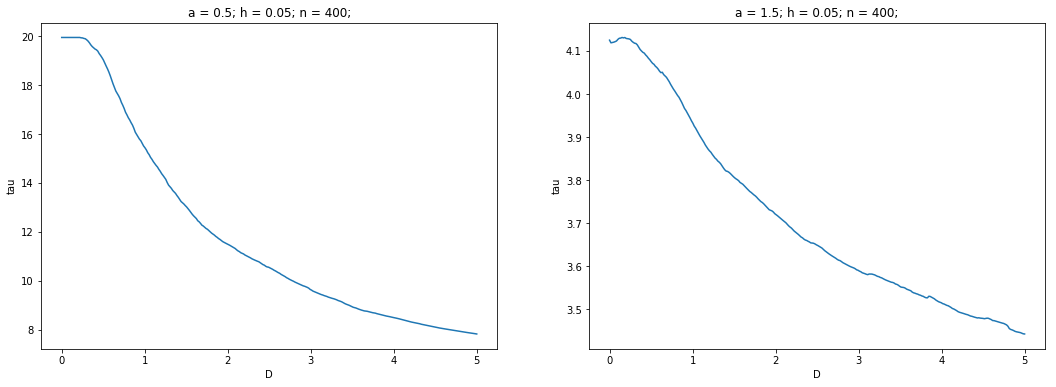

In [12]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

D = np.linspace(0.0, 5.0, 300)

n_iter = 1000
n_threads = 4

n = 400
h = 0.05

for z in (ax1, 0.5), (ax2, 1.5):
    tau = []
    ax, a = z
    for d in D:
        _, _, prob = SDE.heun(x0, h, n, a, seed, n_iter, d, n_threads)
        tau.append(np.trapz(prob, dx=h, axis=0))

    ax.plot(D, tau)
    ax.set_ylabel("tau")
    ax.set_xlabel("D")
    ax.set_title("a = {}; h = {}; n = {};".format(a, h, n))

#### 3. Скорость работы программы при 1,2 и 4 процессорных ядрах

In [13]:
n_threads = [1, 2, 3, 4]

n_iter = 10000
n = 1000
h = 0.01
d = 1.0

t0 = time.time()
SDE.heun(x0, h, n, a, seed, n_iter, d, 1)
t1 = time.time()
sequential_ms = (t1 - t0)*1000

time_ms = []
boost = []

for t in n_threads:
    t0 = time.time()
    SDE.heun(x0, h, n, a, seed, n_iter, d, t)
    t1 = time.time()
    ms = (t1 - t0)*1000
    time_ms.append(ms)
    boost.append(sequential_ms/ms)

print(time_ms)
print(boost)

[1858.6094379425049, 938.4222030639648, 621.0203170776367, 475.5823612213135]
[1.0064685431077356, 1.9933798743301623, 3.0121911985343686, 3.933350110816614]


In [14]:
pd.DataFrame({'threads': n_threads, 'time_ms': time_ms, 'boost': boost})

,threads,time_ms,boost
0,1,1858.609438,1.006469
1,2,938.422203,1.993380
2,3,621.020317,3.012191
3,4,475.582361,3.933350
